In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import torch
import models
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import dataloader as dataloader

im_res=160
# audio_conf = {'num_mel_bins': 128, 'target_length': 1024, 'freqm': 48, 'timem': 192, 'mixup': 0,
#               'dataset': 'MAFW', 'mode':'finetune', 'mean':-5.081, 'std':4.4849,
#               'noise':True, 'label_smooth': 0.3, 'im_res': im_res}
val_audio_conf = {'num_mel_bins': 128, 'target_length': 1024, 'freqm': 0, 'timem': 0, 'mixup': 0, 'dataset': 'voxceleb2',
                  'mode':'pretrain', 'mean': -5.081, 'std': .4849, 'noise': False, 'im_res': im_res}
video_conf = {
    'dataset_type' : 'video', 
    'aa_type': "rand-m7-n4-mstd0.5-inc1",
    'pretrain_rand_flip': True,
    'pretrain_rand_erase_prob': 0.25,
    'pretrain_rand_erase_mode': "pixel",
    'pretrain_rand_erase_count': 1,
    'pretrain_rand_erase_split': False,
    'jitter_aspect_relative': [0.75, 1.3333],
    'jitter_scales_relative': [0.5, 1.0],
    'repeat_aug': 1,
    'num_retries': 10,
    'train_jitter_scales': (224, 224),
    'train_crop_size': im_res,
    'train_random_horizontal_flip': True,
    'test_num_ensemble_views': 10,
    'test_num_spatial_crops': 3,
    'test_crop_size': im_res, # TODO：可以改，主要就是位置编码那地方和patch_embedding那地方
    'sampling_rate': 4,
    'num_frames': 16,
    'target_fps': 30,
    'mean': (0.45, 0.45, 0.45),
    'std': (0.225, 0.225, 0.225),
    'enable_multi_thread_decode': False,
    'inverse_uniform_sampling': False,
    'use_offset_sampling': True
}

val_set = dataloader.AudiosetDataset(
    dataset_json_file='/home/hao/Project/uni-cmae/egs/voxceleb2/test_data.json',
    label_csv='/home/hao/Project/uni-cmae/egs/voxceleb2/class_labels_indices.csv',
    audio_conf=val_audio_conf,
    video_conf=video_conf,
)

# 获取 val_set 中的一个样本
audio, video, label = val_set[55]

print(f'audio shape: {audio.shape}, video shape: {video.shape}, label: {label.shape}')



Dataset has 36237 samples
Using Label Smoothing: 0.0
now using following mask: 0 freq, 0 time
now using mix-up with rate 0.000000
now process voxceleb2
using video data as video input
use dataset mean -5.081 and std 0.485 to normalize the input.
not use noise augmentation
number of classes is 1
now in pretrain mode.
now using 160 * 160 image input
jitter_aspect_relative [0.75, 1.3333] jitter_scales_relative [0.5, 1.0]
Constructing DATASET pretrain...
Perform standard augmentation
here!!!!!
frames.shape: torch.Size([136, 160, 160, 3])
start_idx: 14.929568241328964, end_idx: 67.2629015746623
audio shape: torch.Size([1024, 128]), video shape: torch.Size([3, 16, 160, 160]), label: torch.Size([1])


In [ ]:
import json

with open('../egs/voxceleb2/test_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 打印前5个数据
print(data['data'][:5])


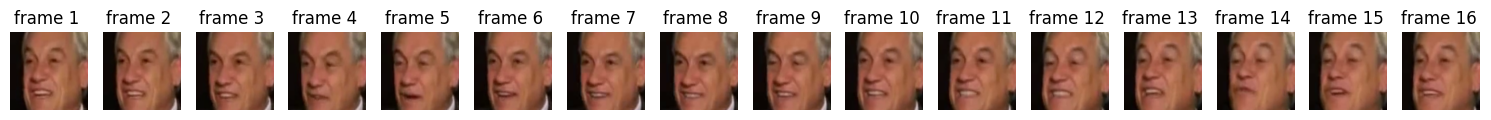

In [4]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np


# 可视化视频帧
plt.figure(figsize=(15, 3))
for i in range(16):  # 显示前16帧
    plt.subplot(1, 16, i+1)
    frame = video[:, i, :, :].permute(1, 2, 0).numpy()  # 调整形状为 (160, 160, 3)
    frame = (frame * video_conf['std'] + video_conf['mean']) * 255  # 反归一化
    frame = frame.astype(np.uint8)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(f'frame {i+1} ')
plt.tight_layout()
plt.show()
